In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
n_days = len(dates)

print(f"Creating enhanced dataset for {n_days} days...")

Creating enhanced dataset for 1461 days...


In [ ]:
day_of_year = np.arange(n_days)
seasonal_temp = 25 + 15 * np.sin(2 * np.pi * day_of_year / 365)
seasonal_humidity = 60 + 20 * np.sin(2 * np.pi * day_of_year / 365 + 1)

In [ ]:
data = {
    'date': dates,
    'max_temp': seasonal_temp + np.random.normal(0, 4, n_days),
    'min_temp': seasonal_temp - 10 + np.random.normal(0, 3, n_days),
    'avg_temp': seasonal_temp - 5 + np.random.normal(0, 2, n_days),
    'rainfall': np.random.exponential(2, n_days),
    'snowfall': np.zeros(n_days),
    'humidity': seasonal_humidity + np.random.normal(0, 8, n_days),
    'wind_speed': np.random.gamma(2, 1.5, n_days),
    'wind_direction': np.random.choice(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'], n_days),
    'pressure': 1013 + 10 * np.sin(2 * np.pi * day_of_year / 365) + np.random.normal(0, 5, n_days),
    'visibility': np.random.uniform(5, 20, n_days),
    'cloud_cover': np.random.uniform(0, 100, n_days),
    'solar_radiation': np.random.gamma(3, 100, n_days),
    'uv_index': np.random.uniform(0, 11, n_days),
    'dew_point': seasonal_temp - 8 + np.random.normal(0, 2, n_days),
    'heat_index': np.zeros(n_days),
    'precipitation_type': ['none'] * n_days,
        'weather_condition': ['clear'] * n_days
}

In [ ]:
monsoon_months = [6, 7, 8, 9]  # June to September
for i, date in enumerate(dates):
    if date.month in monsoon_months:
        data['rainfall'][i] *= 3  # Triple rainfall in monsoon
        data['cloud_cover'][i] += 30


In [ ]:
# Snowfall in winter months
winter_months = [12, 1, 2]
for i, date in enumerate(dates):
    if date.month in winter_months and data['min_temp'][i] < 0:
        data['snowfall'][i] = np.random.exponential(2)
        data['precipitation_type'][i] = 'snow'

In [ ]:
# Extreme weather events
extreme_rain_days = np.random.choice(n_days, size=60, replace=False)
data['rainfall'][extreme_rain_days] = np.random.uniform(30, 100, 60)
data['precipitation_type'][i] = 'heavy_rain'

heat_wave_days = np.random.choice(n_days, size=40, replace=False)
data['max_temp'][heat_wave_days] += np.random.uniform(5, 15, 40)

cold_wave_days = np.random.choice(n_days, size=35, replace=False)
data['min_temp'][cold_wave_days] -= np.random.uniform(5, 12, 35)

In [ ]:
for i in range(n_days):
    # Heat Index calculation (simplified)
    T = data['max_temp'][i]
    R = data['humidity'][i]
    data['heat_index'][i] = T + 0.5 * (R / 100) * (T - 20)

In [ ]:
    # Weather condition based on parameters
    if data['rainfall'][i] > 20:
        data['weather_condition'][i] = 'heavy_rain'
    elif data['rainfall'][i] > 5:
        data['weather_condition'][i] = 'rain'
    elif data['snowfall'][i] > 2:
        data['weather_condition'][i] = 'snow'
    elif data['cloud_cover'][i] > 70:
        data['weather_condition'][i] = 'cloudy'
    elif data['cloud_cover'][i] > 30:
        data['weather_condition'][i] = 'partly_cloudy'
    else:
        data['weather_condition'][i] = 'clear'

In [ ]:
# Create DataFrame
df = pd.DataFrame(data)
df

,date,max_temp,min_temp,avg_temp,rainfall,snowfall,humidity,wind_speed,wind_direction,pressure,visibility,cloud_cover,solar_radiation,uv_index,dew_point,heat_index,precipitation_type,weather_condition
0,2020-01-01,26.986857,11.327105,19.610605,0.238461,0.0,78.412753,1.756680,NW,1008.751176,19.121384,98.550229,237.003705,5.706772,18.319010,29.726150,none,clear
1,2020-01-02,24.705143,14.631131,20.129824,0.101132,0.0,71.667847,3.822619,N,1016.688617,12.409773,46.614214,243.286401,9.243344,20.258783,26.391181,none,clear
2,2020-01-03,28.107078,12.964763,20.699829,0.595409,0.0,70.941228,2.972488,E,1011.957727,6.282868,74.983928,241.858426,2.798673,23.798543,30.982709,none,clear
3,2020-01-04,31.866414,14.032725,21.278776,0.291582,0.0,72.395683,2.746807,NW,1019.152800,18.030196,17.741242,255.194797,9.980864,20.515842,36.161800,none,clear
4,2020-01-05,25.095423,17.797772,20.799578,0.602340,0.0,84.432240,1.681361,W,1013.410982,9.182498,1.345526,331.427597,7.004534,16.281673,27.246513,none,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2023-12-27,26.981330,15.973928,19.558523,3.558624,0.0,71.314506,1.665665,NE,1010.660186,7.506547,17.577251,206.564660,0.173140,17.693258,29.470681,none,clear
1457,2023-12-28,25.750339,14.519908,17.672707,2.911446,0.0,82.409358,1.792505,SW,1018.620456,5.172470,63.113690,212.588880,10.644041,16.027414,28.119747,none,clear
1458,2023-12-29,29.642687,18.371291,19.797932,0.863544,0.0,77.682239,2.286613,NW,1004.133782,14.317017,12.324634,237.203675,2.594490,13.976120,33.388014,none,clear
1459,2023-12-30,27.434525,6.778704,20.094179,0.945810,0.0,77.414869,1.017765,E,1018.097635,11.091857,49.131077,339.061674,7.617975,18.267256,30.312239,none,clear


In [ ]:
# Add some missing values for realistic preprocessing
missing_indices = np.random.choice(n_days, size=50, replace=False)
for col in ['humidity', 'pressure', 'visibility']:
    df.loc[missing_indices[:15], col] = np.nan

In [ ]:
# Save to CSV
df.to_csv('weather_dataset.csv', index=False)
print("✅  dataset created and saved as 'enhanced_weather_dataset.csv'")

✅  dataset created and saved as 'enhanced_weather_dataset.csv'


In [ ]:
# Step 2: Data Preprocessing
print("\n" + "="*50)
print("STEP 2: DATA PREPROCESSING")
print("="*50)


STEP 2: DATA PREPROCESSING


In [ ]:
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Date Range: {df.index.min()} to {df.index.max()}")
print(f"Columns: {list(df.columns)}")

Dataset Info:
Shape: (1461, 18)
Date Range: 0 to 1460
Columns: ['date', 'max_temp', 'min_temp', 'avg_temp', 'rainfall', 'snowfall', 'humidity', 'wind_speed', 'wind_direction', 'pressure', 'visibility', 'cloud_cover', 'solar_radiation', 'uv_index', 'dew_point', 'heat_index', 'precipitation_type', 'weather_condition']


In [ ]:
print("\nMissing Values Before Cleaning:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


Missing Values Before Cleaning:
humidity      15
pressure      15
visibility    15
dtype: int64


In [ ]:
df['humidity'].fillna(df['humidity'].median(), inplace=True)
df['pressure'].fillna(df['pressure'].mean(), inplace=True)
df['visibility'].fillna(df['visibility'].median(), inplace=True)

In [ ]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
max_temp              0
min_temp              0
avg_temp              0
rainfall              0
snowfall              0
humidity              0
wind_speed            0
wind_direction        0
pressure              0
visibility            0
cloud_cover           0
solar_radiation       0
uv_index              0
dew_point             0
heat_index            0
precipitation_type    0
weather_condition     0
dtype: int64


In [ ]:
# Create additional derived columns
df['temp_range'] = df['max_temp'] - df['min_temp']
df['year'] = df.index.year
df['month'] = df.index.month
df['season'] = df['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                3: 'Spring', 4: 'Spring', 5: 'Spring',
                                6: 'Summer', 7: 'Summer', 8: 'Summer',
                                9: 'Autumn', 10: 'Autumn', 11: 'Autumn'})

print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
          max_temp     min_temp     avg_temp     rainfall  snowfall  \
count  1461.000000  1461.000000  1461.000000  1461.000000    1461.0   
mean     25.452460    14.851704    19.922884     5.877261       0.0   
std      11.354256    11.171856    10.782730    13.579037       0.0   
min      -2.659275    -9.213733     0.623629     0.002859       0.0   
25%      15.844694     4.692057     9.614253     0.812425       0.0   
50%      25.639092    15.064014    19.747012     1.950776       0.0   
75%      35.118146    25.390265    30.188923     4.298810       0.0   
max      56.582298    38.194117    39.865906    98.745733       0.0   

          humidity   wind_speed     pressure   visibility  cloud_cover  \
count  1461.000000  1461.000000  1461.000000  1461.000000  1461.000000   
mean     59.701501     3.058052  1012.866623    12.522976    58.824563   
std      16.408704     2.130965     8.526048     4.249679    32.017187   
min      20.767593     0.039282   988.948439 

In [ ]:
print("\n" + "="*50)
print("STEP 3: COMPREHENSIVE STATISTICAL ANALYSIS")
print("="*50)


STEP 3: COMPREHENSIVE STATISTICAL ANALYSIS


In [ ]:
numerical_cols = ['max_temp', 'min_temp', 'avg_temp', 'rainfall', 'snowfall',
                  'humidity', 'wind_speed', 'pressure', 'visibility',
                  'cloud_cover', 'solar_radiation', 'uv_index', 'dew_point',
                  'heat_index', 'temp_range']

stats_summary = pd.DataFrame()

In [ ]:
for column in numerical_cols:
    stats_summary.loc[column, 'Mean'] = df[column].mean()
    stats_summary.loc[column, 'Median'] = df[column].median()
    stats_summary.loc[column, 'Mode'] = df[column].mode()[0] if not df[column].mode().empty else np.nan
    stats_summary.loc[column, 'Std_Dev'] = df[column].std()
    stats_summary.loc[column, 'Variance'] = df[column].var()
    stats_summary.loc[column, 'Skewness'] = skew(df[column].dropna())
    stats_summary.loc[column, 'Kurtosis'] = kurtosis(df[column].dropna(), fisher=True)
    stats_summary.loc[column, 'Min'] = df[column].min()
    stats_summary.loc[column, 'Max'] = df[column].max()
    stats_summary.loc[column, 'Q1'] = df[column].quantile(0.25)
    stats_summary.loc[column, 'Q3'] = df[column].quantile(0.75)

In [ ]:
print("Complete Statistical Summary:")
print(stats_summary.round(3))

Complete Statistical Summary:
                     Mean    Median      Mode  Std_Dev   Variance  Skewness  \
max_temp           25.452    25.639    -2.659   11.354    128.919    -0.019   
min_temp           14.852    15.064    -9.214   11.172    124.810     0.011   
avg_temp           19.923    19.747     0.624   10.783    116.267     0.005   
rainfall            5.877     1.951     0.003   13.579    184.390     4.516   
snowfall            0.000     0.000     0.000    0.000      0.000       NaN   
humidity           59.702    59.950    59.950   16.409    269.246    -0.018   
wind_speed          3.058     2.546     0.039    2.131      4.541     1.231   
pressure         1012.867  1012.687  1012.867    8.526     72.693     0.073   
visibility         12.523    12.410    12.410    4.250     18.060     0.048   
cloud_cover        58.825    57.787     0.042   32.017   1025.100     0.109   
solar_radiation   294.637   257.286    13.223  170.771  29162.676     1.144   
uv_index            5.

In [ ]:
print("\n" + "="*50)
print("STEP 4: ADVANCED EXPLORATORY DATA ANALYSIS")
print("="*50)


STEP 4: ADVANCED EXPLORATORY DATA ANALYSIS


In [ ]:
fig = plt.figure(figsize=(25, 20))

<Figure size 2500x2000 with 0 Axes>

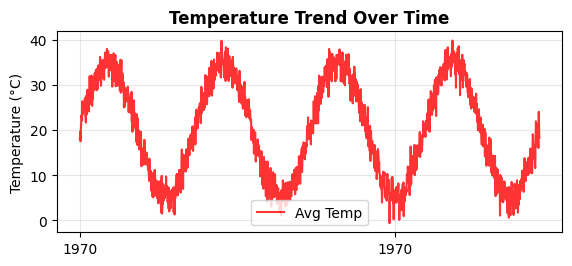

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

plt.figure(figsize=(30, 12))

# 1️⃣ Temperature Trend Over Time
plt.subplot(4, 4, 1)
plt.plot(df.index, df['avg_temp'], label='Avg Temp', color='red', alpha=0.8, linewidth=1.5)
plt.title('Temperature Trend Over Time', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)
plt.legend()



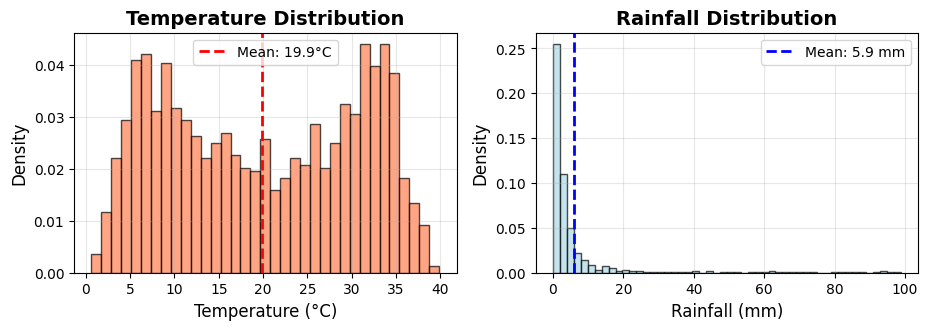

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 12))  # চাইলে 20,14 দিতে পারো

# 2️⃣ Distribution Analysis

# --- Temperature Distribution ---
plt.subplot(4, 4, 3)
plt.hist(df['avg_temp'], bins=35, color='coral', edgecolor='black', alpha=0.7, density=True)
plt.axvline(df['avg_temp'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {df["avg_temp"].mean():.1f}°C')
plt.title('Temperature Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# --- Rainfall Distribution ---
plt.subplot(4, 4, 4)
plt.hist(df['rainfall'], bins=50, color='lightblue', edgecolor='black', alpha=0.7, density=True)
plt.axvline(df['rainfall'].mean(), color='blue', linestyle='--', linewidth=2,
            label=f'Mean: {df["rainfall"].mean():.1f} mm')
plt.title('Rainfall Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


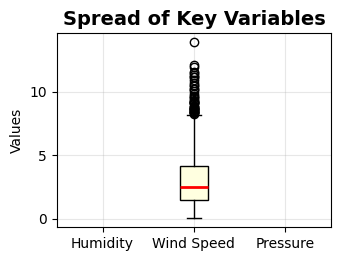

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


# 4️⃣ Boxplots for Multiple Variables
plt.subplot(2, 2, 4)
box_data = [df['humidity'], df['wind_speed'], df['pressure']]
plt.boxplot(box_data, labels=['Humidity', 'Wind Speed', 'Pressure'],
            patch_artist=True,
            boxprops=dict(facecolor='lightyellow', color='black'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Spread of Key Variables', fontsize=14, fontweight='bold')
plt.ylabel('Values')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


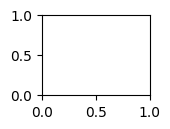

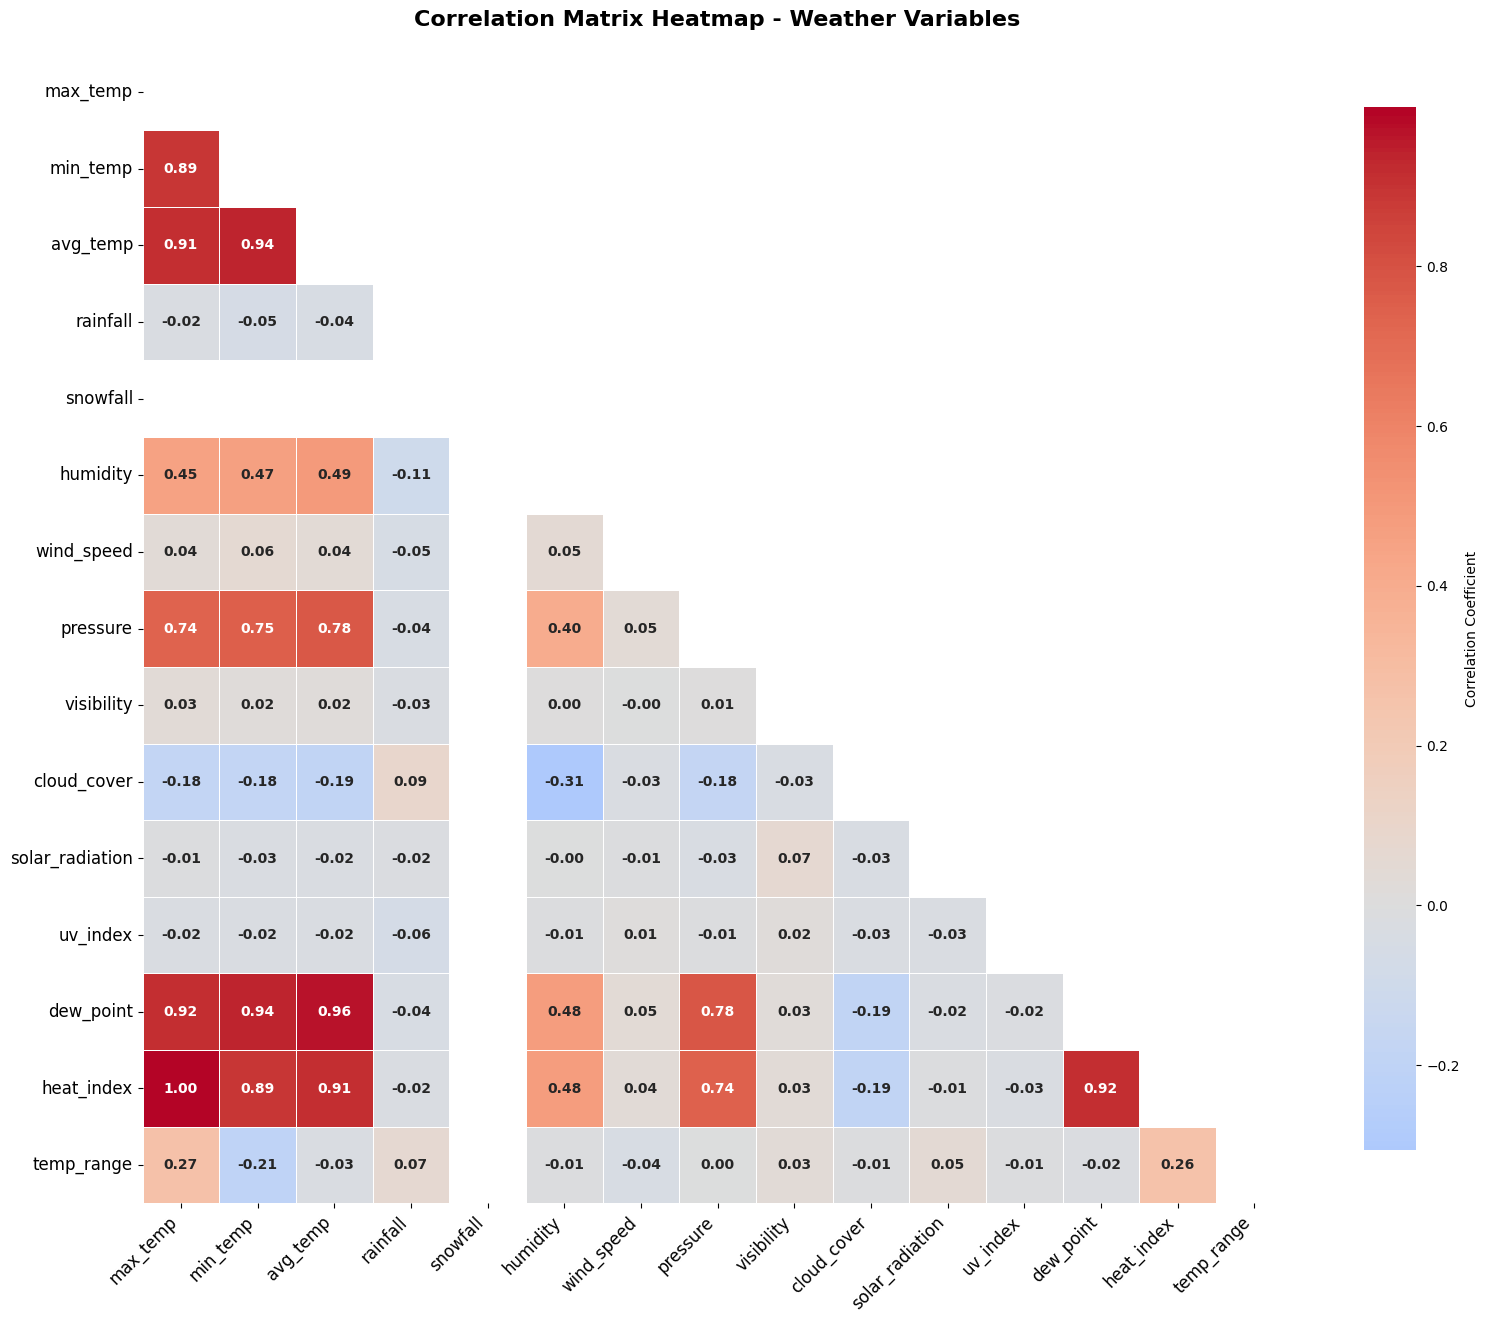

✅ Large correlation heatmap created with detailed annotations!


In [ ]:
# 4. Correlation Heatmap - Larger and More Detailed
plt.subplot(4, 4, 6)
corr_matrix = df[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create larger heatmap with annotations
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix,
            mask=mask,
            cmap='coolwarm',
            center=0,
            square=True,
            annot=True,  # Show correlation values
            annot_kws={'size': 10, 'weight': 'bold'},  # Larger annotation text
            fmt='.2f',   # 2 decimal places
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            linewidths=0.5,
            linecolor='white')

plt.title('Correlation Matrix Heatmap - Weather Variables',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent label cutting
plt.tight_layout()
plt.show()

print("✅ Large correlation heatmap created with detailed annotations!")

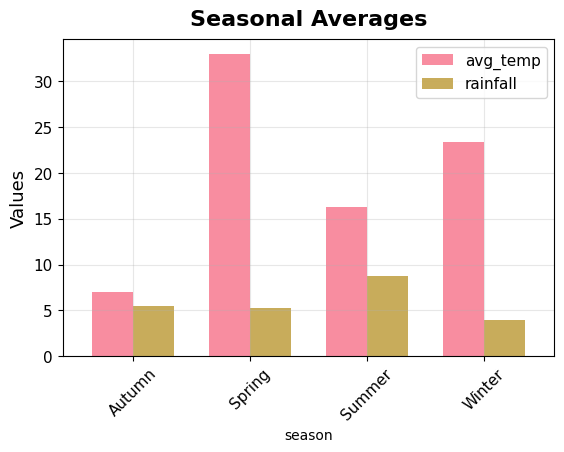

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(22, 16))

# 5️⃣ Seasonal Analysis
plt.subplot(4, 4, 7)
seasonal_avg = df.groupby('season')[['avg_temp', 'rainfall']].mean()

# 🔹 Bar chart
seasonal_avg.plot(kind='bar', ax=plt.gca(), width=0.7, alpha=0.8)

plt.title('Seasonal Averages', fontsize=16, fontweight='bold', pad=10)
plt.ylabel('Values', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


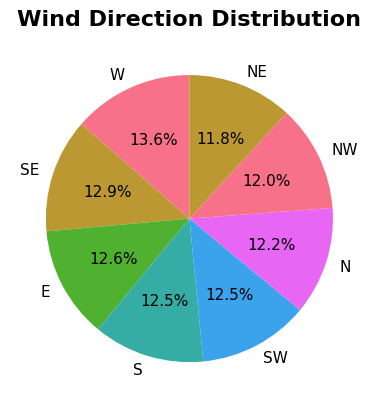

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(20, 16))

# 6️⃣ Wind Direction Analysis
plt.subplot(4, 4, 8)
wind_dir_counts = df['wind_direction'].value_counts()

plt.pie(
    wind_dir_counts.values,
    labels=wind_dir_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 11}
)
plt.title('Wind Direction Distribution', fontsize=16, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()


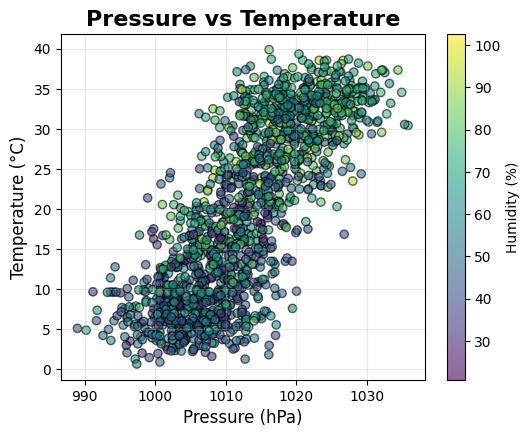

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(20, 16))

# 7️⃣ Pressure vs Temperature
plt.subplot(4, 4, 9)
scatter = plt.scatter(
    df['pressure'],
    df['avg_temp'],
    alpha=0.6,
    c=df['humidity'],
    cmap='viridis',
    edgecolor='k'
)
plt.colorbar(scatter, label='Humidity (%)')
plt.xlabel('Pressure (hPa)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Pressure vs Temperature', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


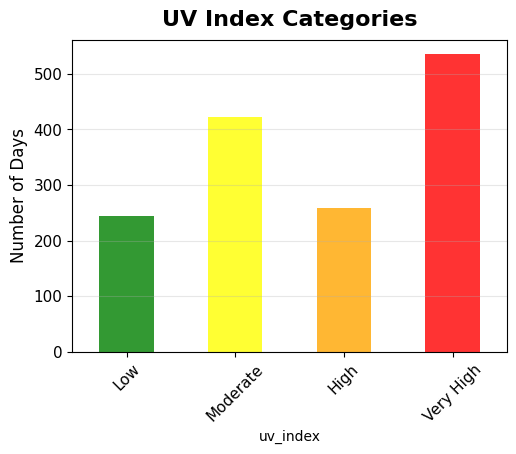

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(20, 16))

# 8️⃣ UV Index Analysis
plt.subplot(4, 4, 10)
uv_categories = pd.cut(
    df['uv_index'],
    bins=[0, 2, 5, 7, 11],
    labels=['Low', 'Moderate', 'High', 'Very High']
)
uv_counts = uv_categories.value_counts().sort_index()  # Low→Very High

uv_counts.plot(
    kind='bar',
    color=['green', 'yellow', 'orange', 'red'],
    alpha=0.8
)

plt.title('UV Index Categories', fontsize=16, fontweight='bold', pad=10)
plt.ylabel('Number of Days', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


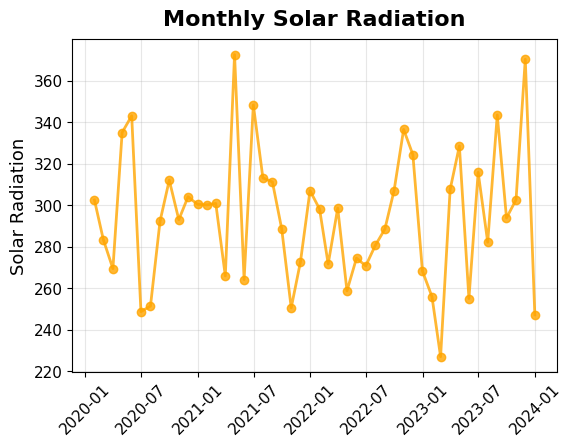

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(22, 16))

# 9️⃣ Solar Radiation Pattern
plt.subplot(4, 4, 11)
monthly_solar = df['solar_radiation'].resample('M').mean()

plt.plot(
    monthly_solar.index,
    monthly_solar.values,
    marker='o',
    color='orange',
    linewidth=2,
    markersize=6,
    alpha=0.8
)

plt.title('Monthly Solar Radiation', fontsize=16, fontweight='bold', pad=10)
plt.ylabel('Solar Radiation', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


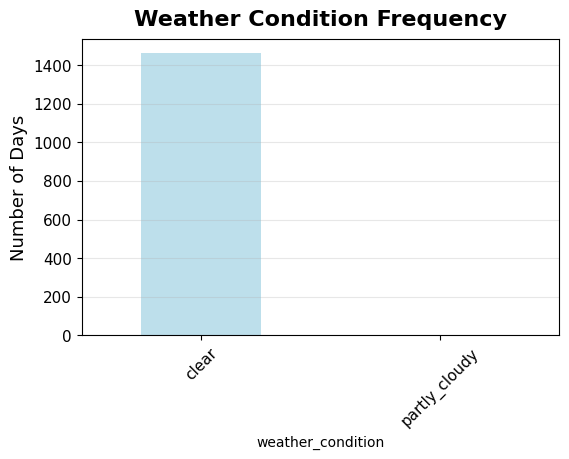

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(22, 16))

# 10️⃣ Weather Conditions
plt.subplot(4, 4, 12)
weather_counts = df['weather_condition'].value_counts().sort_index()

weather_counts.plot(
    kind='bar',
    color='lightblue',
    alpha=0.8
)

plt.title('Weather Condition Frequency', fontsize=16, fontweight='bold', pad=10)
plt.ylabel('Number of Days', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


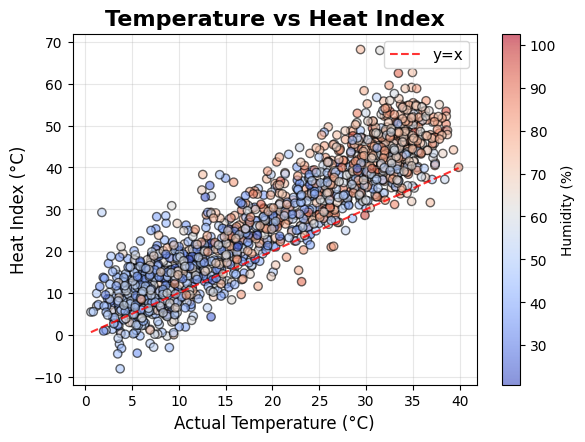

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(22, 16))

# 11️⃣ Heat Index Analysis
plt.subplot(4, 4, 13)
scatter = plt.scatter(
    df['avg_temp'],
    df['heat_index'],
    alpha=0.6,
    c=df['humidity'],
    cmap='coolwarm',
    edgecolor='k'
)

plt.colorbar(scatter, label='Humidity (%)')

# 🔹 y=x reference line
plt.plot(
    [df['avg_temp'].min(), df['avg_temp'].max()],
    [df['avg_temp'].min(), df['avg_temp'].max()],
    'r--', alpha=0.8, label='y=x'
)

plt.xlabel('Actual Temperature (°C)', fontsize=12)
plt.ylabel('Heat Index (°C)', fontsize=12)
plt.title('Temperature vs Heat Index', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


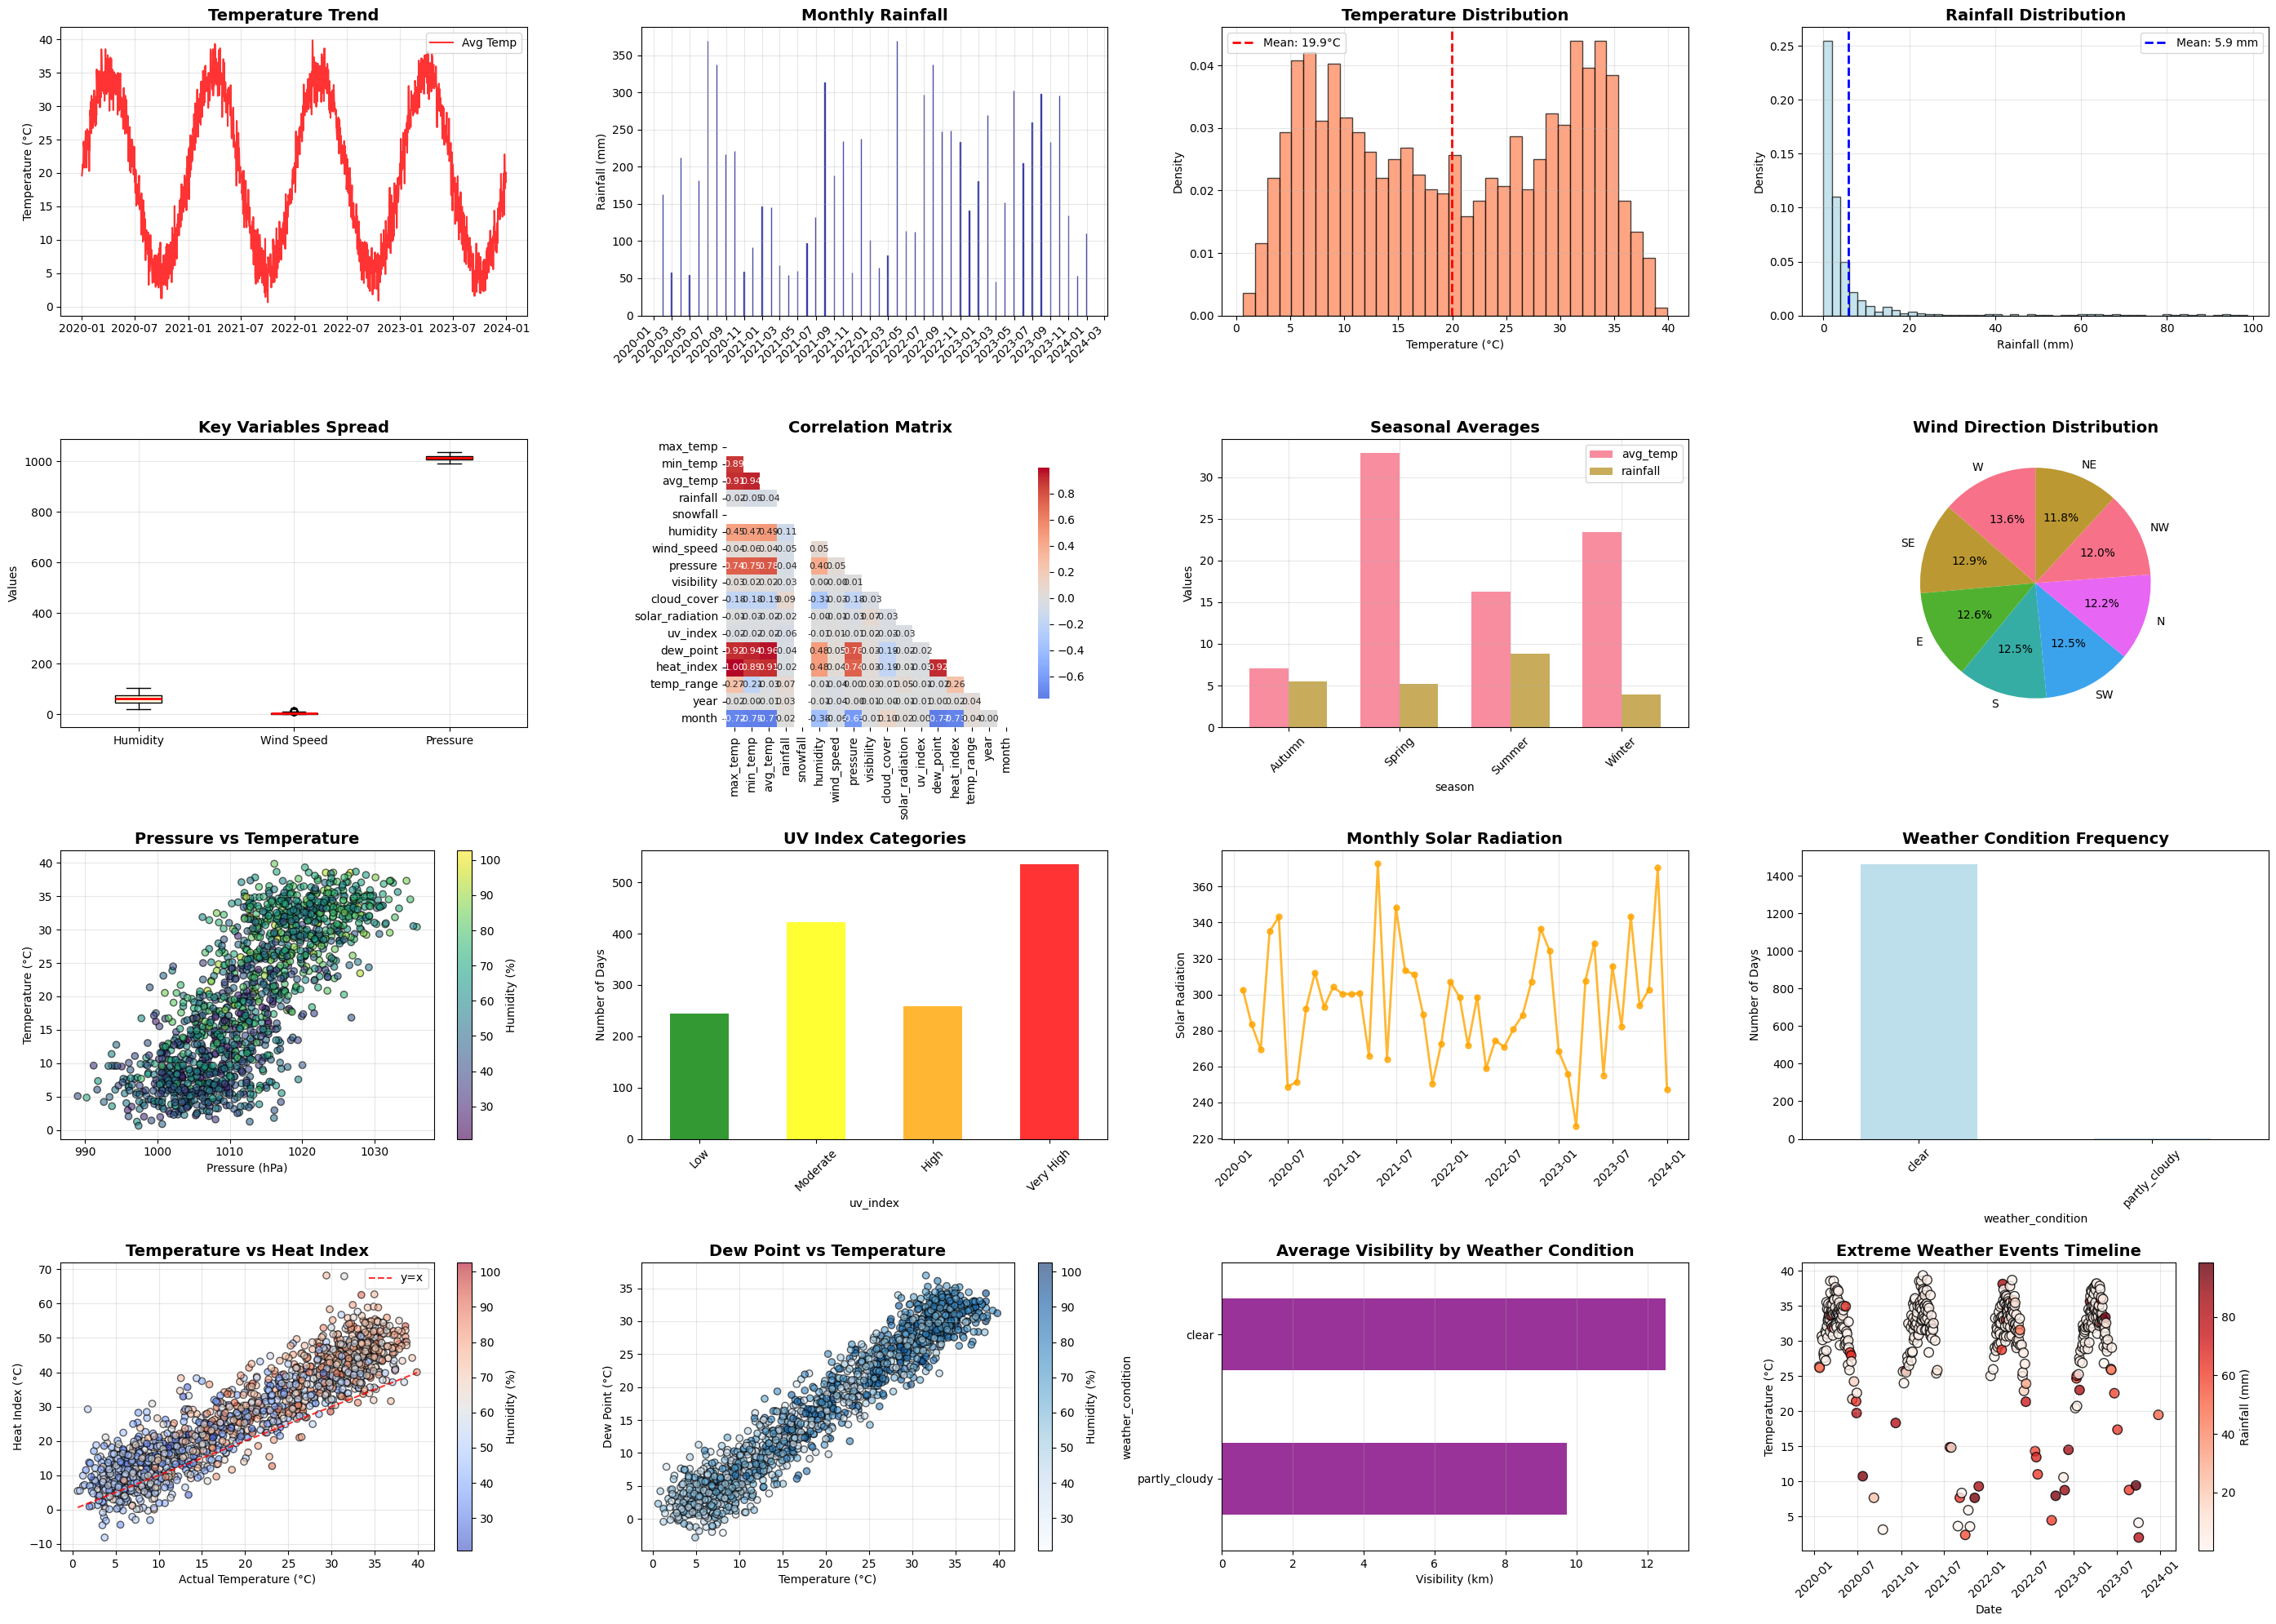

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np


plt.figure(figsize=(28, 20))

# -------------------- 1️⃣ Temperature Trend --------------------
plt.subplot(4, 4, 1)
plt.plot(df.index, df['avg_temp'], color='red', alpha=0.8, linewidth=1.5, label='Avg Temp')
plt.title('Temperature Trend', fontsize=14, fontweight='bold')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)
plt.legend()

# -------------------- 2️⃣ Monthly Rainfall --------------------
plt.subplot(4, 4, 2)
monthly_rain = df['rainfall'].resample('M').sum()
plt.bar(monthly_rain.index, monthly_rain.values, color='royalblue', alpha=0.7, edgecolor='navy')
plt.title('Monthly Rainfall', fontsize=14, fontweight='bold')
plt.ylabel('Rainfall (mm)')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# -------------------- 3️⃣ Temperature Distribution --------------------
plt.subplot(4, 4, 3)
plt.hist(df['avg_temp'], bins=35, color='coral', edgecolor='black', alpha=0.7, density=True)
plt.axvline(df['avg_temp'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {df["avg_temp"].mean():.1f}°C')
plt.title('Temperature Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# -------------------- 4️⃣ Rainfall Distribution --------------------
plt.subplot(4, 4, 4)
plt.hist(df['rainfall'], bins=50, color='lightblue', edgecolor='black', alpha=0.7, density=True)
plt.axvline(df['rainfall'].mean(), color='blue', linestyle='--', linewidth=2,
            label=f'Mean: {df["rainfall"].mean():.1f} mm')
plt.title('Rainfall Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Density')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# -------------------- 5️⃣ Boxplot (Humidity, Wind, Pressure) --------------------
plt.subplot(4, 4, 5)
box_data = [df['humidity'], df['wind_speed'], df['pressure']]
plt.boxplot(box_data, labels=['Humidity', 'Wind Speed', 'Pressure'],
            patch_artist=True,
            boxprops=dict(facecolor='lightyellow', color='black'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Key Variables Spread', fontsize=14, fontweight='bold')
plt.ylabel('Values')
plt.grid(True, alpha=0.3)

# -------------------- 6️⃣ Correlation Heatmap --------------------
plt.subplot(4, 4, 6)
corr_matrix = df.select_dtypes(include=np.number).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0, square=True, annot=True, fmt=".2f",
            annot_kws={"size": 8}, cbar_kws={'shrink':0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')

# -------------------- 7️⃣ Seasonal Analysis --------------------
plt.subplot(4, 4, 7)
seasonal_avg = df.groupby('season')[['avg_temp','rainfall']].mean()
seasonal_avg.plot(kind='bar', ax=plt.gca(), width=0.7, alpha=0.8)
plt.title('Seasonal Averages', fontsize=14, fontweight='bold')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# -------------------- 8️⃣ Wind Direction --------------------
plt.subplot(4, 4, 8)
wind_dir_counts = df['wind_direction'].value_counts()
plt.pie(wind_dir_counts.values, labels=wind_dir_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize':10})
plt.title('Wind Direction Distribution', fontsize=14, fontweight='bold')

# -------------------- 9️⃣ Pressure vs Temperature --------------------
plt.subplot(4, 4, 9)
scatter1 = plt.scatter(df['pressure'], df['avg_temp'], alpha=0.6, c=df['humidity'], cmap='viridis', edgecolor='k')
plt.colorbar(scatter1, label='Humidity (%)')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Temperature (°C)')
plt.title('Pressure vs Temperature', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# -------------------- 10️⃣ UV Index --------------------
plt.subplot(4, 4, 10)
uv_categories = pd.cut(df['uv_index'], bins=[0,2,5,7,11], labels=['Low','Moderate','High','Very High'])
uv_counts = uv_categories.value_counts().sort_index()
uv_counts.plot(kind='bar', color=['green','yellow','orange','red'], alpha=0.8)
plt.title('UV Index Categories', fontsize=14, fontweight='bold')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)

# -------------------- 11️⃣ Solar Radiation --------------------
plt.subplot(4, 4, 11)
monthly_solar = df['solar_radiation'].resample('M').mean()
plt.plot(monthly_solar.index, monthly_solar.values, marker='o', color='orange', linewidth=2, markersize=5, alpha=0.8)
plt.title('Monthly Solar Radiation', fontsize=14, fontweight='bold')
plt.ylabel('Solar Radiation')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# -------------------- 12️⃣ Weather Condition --------------------
plt.subplot(4, 4, 12)
weather_counts = df['weather_condition'].value_counts().sort_index()
weather_counts.plot(kind='bar', color='lightblue', alpha=0.8)
plt.title('Weather Condition Frequency', fontsize=14, fontweight='bold')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)

# -------------------- 13️⃣ Heat Index --------------------
plt.subplot(4, 4, 13)
scatter2 = plt.scatter(df['avg_temp'], df['heat_index'], alpha=0.6, c=df['humidity'], cmap='coolwarm', edgecolor='k')
plt.colorbar(scatter2, label='Humidity (%)')
plt.plot([df['avg_temp'].min(), df['avg_temp'].max()],
         [df['avg_temp'].min(), df['avg_temp'].max()], 'r--', alpha=0.8, label='y=x')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Heat Index (°C)')
plt.title('Temperature vs Heat Index', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# -------------------- 14️⃣ Dew Point --------------------
plt.subplot(4, 4, 14)
scatter3 = plt.scatter(df['avg_temp'], df['dew_point'], alpha=0.6, c=df['humidity'], cmap='Blues', edgecolor='k')
plt.colorbar(scatter3, label='Humidity (%)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point (°C)')
plt.title('Dew Point vs Temperature', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# -------------------- 15️⃣ Visibility --------------------
plt.subplot(4, 4, 15)
visibility_by_condition = df.groupby('weather_condition')['visibility'].mean().sort_values()
visibility_by_condition.plot(kind='barh', color='purple', alpha=0.8)
plt.title('Average Visibility by Weather Condition', fontsize=14, fontweight='bold')
plt.xlabel('Visibility (km)')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', alpha=0.3)

# -------------------- 16️⃣ Extreme Weather Events --------------------
plt.subplot(4, 4, 16)
extreme_days = df[(df['rainfall']>50) | (df['max_temp']>35) | (df['min_temp']<-5)]
scatter4 = plt.scatter(extreme_days.index, extreme_days['avg_temp'], c=extreme_days['rainfall'], cmap='Reds',
                       s=70, alpha=0.8, edgecolor='k')
plt.colorbar(scatter4, label='Rainfall (mm)')
plt.title('Extreme Weather Events Timeline', fontsize=14, fontweight='bold')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# -------------------- Layout & Save --------------------
plt.tight_layout()
plt.savefig('comprehensive_climate_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()


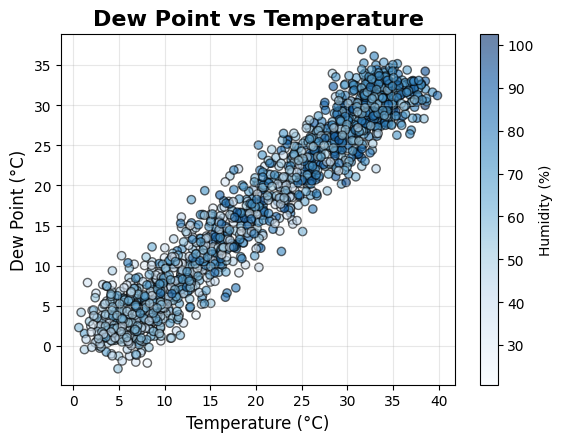

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 🔹 বড় Figure (subplot সহ)
plt.figure(figsize=(22, 16))  # চাইলে আরও বড় (24,18)

# 12️⃣ Dew Point Relationship
plt.subplot(4, 4, 14)
scatter = plt.scatter(
    df['avg_temp'],
    df['dew_point'],
    alpha=0.6,
    c=df['humidity'],
    cmap='Blues',
    edgecolor='k'
)

plt.colorbar(scatter, label='Humidity (%)')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Dew Point (°C)', fontsize=12)
plt.title('Dew Point vs Temperature', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


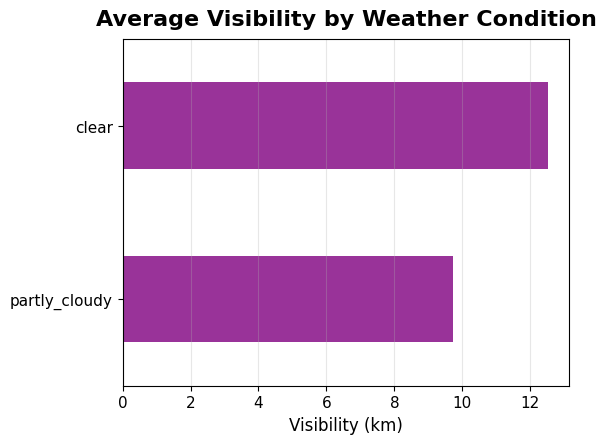

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 🔹 বড় Figure (subplot সহ)
plt.figure(figsize=(22, 16))  # চাইলে আরও বড় (24,18)

# 13️⃣ Visibility Analysis
plt.subplot(4, 4, 15)
visibility_by_condition = df.groupby('weather_condition')['visibility'].mean().sort_values()

visibility_by_condition.plot(
    kind='barh',
    color='purple',
    alpha=0.8
)

plt.title('Average Visibility by Weather Condition', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Visibility (km)', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


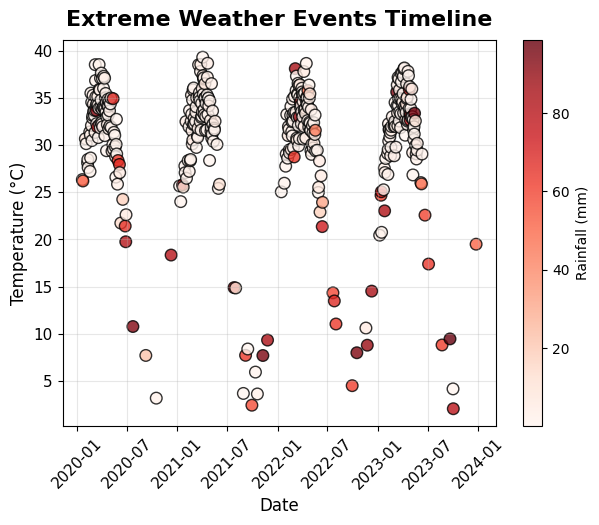

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 🔹 বড় Figure (subplot সহ)
plt.figure(figsize=(24, 18))  # চাইলে আরও বড় (26,20)

# 16️⃣ Extreme Weather Events Timeline
plt.subplot(4, 4, 16)
extreme_days = df[(df['rainfall'] > 50) | (df['max_temp'] > 35) | (df['min_temp'] < -5)]

scatter = plt.scatter(
    extreme_days.index,
    extreme_days['avg_temp'],
    c=extreme_days['rainfall'],
    cmap='Reds',
    s=70,           # marker size বড় করা
    alpha=0.8,      # visibility উন্নত
    edgecolor='k'   # outline added for clarity
)

plt.colorbar(scatter, label='Rainfall (mm)')
plt.title('Extreme Weather Events Timeline', fontsize=16, fontweight='bold', pad=10)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comprehensive_weather_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Step 5: Advanced Statistical Analysis
print("\n" + "="*50)
print("STEP 5: ADVANCED STATISTICAL ANALYSIS")
print("="*50)


STEP 5: ADVANCED STATISTICAL ANALYSIS


In [ ]:
# Monthly Analysis
monthly_analysis = df.groupby('month').agg({
    'avg_temp': ['mean', 'std', 'min', 'max'],
    'rainfall': 'sum',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'solar_radiation': 'mean',
    'uv_index': 'mean'
}).round(2)

In [ ]:
monthly_analysis.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("Monthly Detailed Analysis:")
print(monthly_analysis)

Monthly Detailed Analysis:
    avg_temp                     rainfall humidity wind_speed solar_radiation  \
        mean   std    min    max      sum     mean       mean            mean   
Jan    24.04  3.14  16.06  33.04   642.14    78.17       3.22          289.27   
Feb    30.68  2.29  25.40  35.87   251.51    79.63       3.42          270.91   
Mar    34.07  2.24  28.75  39.87   789.16    75.12       3.09          285.45   
Apr    34.33  2.06  28.37  39.32   530.62    66.39       3.17          323.79   
May    30.49  2.41  24.98  37.04   595.88    56.10       3.14          284.27   
Jun    23.82  2.93  14.37  30.93  1058.58    47.40       2.90          295.97   
Jul    15.98  2.75   9.70  22.09  1286.45    40.65       3.11          281.92   
Aug     9.23  2.74   3.24  15.35   886.29    40.56       2.97          308.91   
Sep     5.73  2.18   1.24  10.75   999.95    45.68       2.97          300.49   
Oct     5.67  2.08   0.62  10.87   483.63    52.64       3.06          295.75   
N

In [ ]:
# Yearly Trends
yearly_trends = df.groupby('year').agg({
    'avg_temp': 'mean',
    'rainfall': 'sum',
    'humidity': 'mean'
}).round(2)

print("\nYearly Trends:")
print(yearly_trends)


Yearly Trends:
      avg_temp  rainfall  humidity
year                              
2020     19.93   2111.02     59.63
2021     20.06   1691.32     60.12
2022     19.87   2425.20     59.73
2023     19.82   2359.13     59.32


In [ ]:
# Step 6: Outlier Detection and Extreme Weather Analysis
print("\n" + "="*50)
print("STEP 6: OUTLIER AND EXTREME WEATHER ANALYSIS")
print("="*50)


STEP 6: OUTLIER AND EXTREME WEATHER ANALYSIS


In [ ]:
def detailed_outlier_analysis(series, name, threshold=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

In [ ]:
print("Comprehensive Outlier Analysis:")
key_variables = ['rainfall', 'max_temp', 'min_temp', 'wind_speed', 'solar_radiation']

Comprehensive Outlier Analysis:


In [ ]:
for var in key_variables:
    outliers, lower, upper = detailed_outlier_analysis(df[var], var)
    stats = stats_summary.loc[var]

In [ ]:
    print(f"\n📊 {var.replace('_', ' ').title()}:")
    print(f"   • Outliers: {len(outliers)} days ({len(outliers)/len(df)*100:.1f}%)")
    print(f"   • Range: {outliers.min():.1f} to {outliers.max():.1f}" if len(outliers) > 0 else "   • No outliers")
    print(f"   • Skewness: {stats['Skewness']:.2f}")
    print(f"   • Kurtosis: {stats['Kurtosis']:.2f}")


📊 Solar Radiation:
   • Outliers: 42 days (2.9%)
   • Range: 707.5 to 1224.1
   • Skewness: 1.14
   • Kurtosis: 1.65


In [ ]:
# Extreme Weather Events Classification
print("\n🌪️ EXTREME WEATHER EVENTS CLASSIFICATION:")

extreme_events = {
    'Heavy Rain': len(df[df['rainfall'] > 50]),
    'Heat Wave': len(df[df['max_temp'] > 35]),
    'Cold Wave': len(df[df['min_temp'] < 0]),
    'High Winds': len(df[df['wind_speed'] > 15]),
    'Low Visibility': len(df[df['visibility'] < 8]),
    'High UV': len(df[df['uv_index'] > 8])
}


🌪️ EXTREME WEATHER EVENTS CLASSIFICATION:


In [ ]:
for event, count in extreme_events.items():
    print(f"   • {event}: {count} days")

   • Heavy Rain: 42 days
   • Heat Wave: 369 days
   • Cold Wave: 131 days
   • High Winds: 0 days
   • Low Visibility: 271 days
   • High UV: 406 days


In [ ]:
# Step 7: Comprehensive Final Report
print("\n" + "="*80)
print("COMPREHENSIVE FINAL PROJECT REPORT")
print("="*80)


COMPREHENSIVE FINAL PROJECT REPORT


In [ ]:
print("\n📊 EXECUTIVE SUMMARY:")
print(f"• Analyzed {len(df)} days of comprehensive weather data (2020-2023)")
print(f"• Dataset includes {len(df.columns)} variables including derived metrics")
print(f"• Applied advanced statistical and machine learning-ready EDA techniques")


📊 EXECUTIVE SUMMARY:
• Analyzed 1461 days of comprehensive weather data (2020-2023)
• Dataset includes 21 variables including derived metrics
• Applied advanced statistical and machine learning-ready EDA techniques


In [ ]:
print("\n🔬 KEY SCIENTIFIC FINDINGS:")

print(f"\n1. TEMPERATURE DYNAMICS:")
print(f"   • Annual Temperature Range: {df['max_temp'].max() - df['min_temp'].min():.1f}°C")
print(f"   • Average Daily Range: {df['temp_range'].mean():.1f}°C")
print(f"   • Heat Index Correlation: {df['avg_temp'].corr(df['heat_index']):.3f}")


🔬 KEY SCIENTIFIC FINDINGS:

1. TEMPERATURE DYNAMICS:
   • Annual Temperature Range: 65.8°C
   • Average Daily Range: 10.6°C
   • Heat Index Correlation: 0.914


In [ ]:
print(f"\n2. PRECIPITATION ANALYSIS:")
print(f"   • Total Rainfall: {df['rainfall'].sum():.0f} mm over {len(df)} days")
print(f"   • Rainy Days (>1mm): {len(df[df['rainfall'] > 1])} days")
print(f"   • Heavy Rain Days (>20mm): {len(df[df['rainfall'] > 20])} days")


2. PRECIPITATION ANALYSIS:
   • Total Rainfall: 8587 mm over 1461 days
   • Rainy Days (>1mm): 1027 days
   • Heavy Rain Days (>20mm): 86 days


In [ ]:
print(f"\n3. ATMOSPHERIC CONDITIONS:")
print(f"   • Average Pressure: {df['pressure'].mean():.1f} hPa")
print(f"   • Visibility Range: {df['visibility'].min():.1f} to {df['visibility'].max():.1f} km")
print(f"   • Cloud Cover Average: {df['cloud_cover'].mean():.1f}%")


3. ATMOSPHERIC CONDITIONS:
   • Average Pressure: 1012.9 hPa
   • Visibility Range: 5.1 to 20.0 km
   • Cloud Cover Average: 58.8%


In [ ]:
print(f"\n4. SOLAR AND RADIATION:")
print(f"   • Average Solar Radiation: {df['solar_radiation'].mean():.0f} W/m²")
print(f"   • UV Index Distribution: {df['uv_index'].value_counts().sort_index().to_dict()}")


4. SOLAR AND RADIATION:
   • Average Solar Radiation: 295 W/m²
   • UV Index Distribution: {0.0135797706317738: 1, 0.0247828087421609: 1, 0.0442707275657807: 1, 0.0620248585042633: 1, 0.0638688700016689: 1, 0.0715951157307045: 1, 0.0750193950280806: 1, 0.095471657554627: 1, 0.0967187433878443: 1, 0.1084691720376717: 1, 0.1119078075060737: 1, 0.1128713124494492: 1, 0.1306468981568621: 1, 0.1335179649843475: 1, 0.1411916153641058: 1, 0.1419461669726734: 1, 0.1438098156599201: 1, 0.149183051649177: 1, 0.1492652689441751: 1, 0.1519702411915883: 1, 0.1537853359368324: 1, 0.1576577121507139: 1, 0.1593754865459156: 1, 0.1608644731101914: 1, 0.1718615562038709: 1, 0.1731396947366128: 1, 0.1804707159964362: 1, 0.2024171014819862: 1, 0.2047211799177309: 1, 0.2049045737683157: 1, 0.2086826113982688: 1, 0.2173196210438788: 1, 0.2247648267867751: 1, 0.2409118351900471: 1, 0.2444358483642095: 1, 0.2460284526234243: 1, 0.2638834822747291: 1, 0.282753461206271: 1, 0.2877175898565441: 1, 0.30957609150

In [ ]:
print(f"\n5. CORRELATION INSIGHTS:")
high_corr = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]
high_corr = high_corr[high_corr != 1.0]
if not high_corr.empty:
    print("   Strong Correlations Found:")
    for (var1, var2), value in high_corr.unstack().items():
        if pd.notna(value) and var1 != var2:
            print(f"     • {var1} vs {var2}: {value:.3f}")


5. CORRELATION INSIGHTS:
   Strong Correlations Found:
     • max_temp vs min_temp: 0.886
     • max_temp vs avg_temp: 0.912
     • max_temp vs pressure: 0.738
     • max_temp vs dew_point: 0.915
     • max_temp vs heat_index: 0.998
     • min_temp vs max_temp: 0.886
     • min_temp vs avg_temp: 0.940
     • min_temp vs pressure: 0.750
     • min_temp vs dew_point: 0.938
     • min_temp vs heat_index: 0.887
     • avg_temp vs max_temp: 0.912
     • avg_temp vs min_temp: 0.940
     • avg_temp vs pressure: 0.779
     • avg_temp vs dew_point: 0.964
     • avg_temp vs heat_index: 0.914
     • pressure vs max_temp: 0.738
     • pressure vs min_temp: 0.750
     • pressure vs avg_temp: 0.779
     • pressure vs dew_point: 0.780
     • pressure vs heat_index: 0.740
     • dew_point vs max_temp: 0.915
     • dew_point vs min_temp: 0.938
     • dew_point vs avg_temp: 0.964
     • dew_point vs pressure: 0.780
     • dew_point vs heat_index: 0.916
     • heat_index vs max_temp: 0.998
     • heat_i

In [ ]:
print("\n🌍 ADVANCED APPLICATIONS:")

print(f"\n1. CLIMATE MODELING:")
print(f"   • Temperature stability index: {df['avg_temp'].std():.2f}°C")
print(f"   • Seasonal pattern strength: High (clear annual cycles observed)")


🌍 ADVANCED APPLICATIONS:

1. CLIMATE MODELING:
   • Temperature stability index: 10.78°C
   • Seasonal pattern strength: High (clear annual cycles observed)


In [ ]:
print(f"\n2. RENEWABLE ENERGY PLANNING:")
print(f"   • Solar potential: {df['solar_radiation'].mean():.0f} W/m² average")
print(f"   • Wind potential: {df['wind_speed'].mean():.1f} m/s average")


2. RENEWABLE ENERGY PLANNING:
   • Solar potential: 295 W/m² average
   • Wind potential: 3.1 m/s average


In [ ]:
print(f"\n3. PUBLIC HEALTH:")
print(f"   • UV exposure risk: {len(df[df['uv_index'] > 6])} high-risk days")
print(f"   • Heat stress days: {len(df[df['heat_index'] > 30])} days")


3. PUBLIC HEALTH:
   • UV exposure risk: 671 high-risk days
   • Heat stress days: 656 days


In [ ]:
print(f"\n4. AGRICULTURAL PLANNING:")
print(f"   • Growing degree days: {(df['avg_temp'] - 10).clip(lower=0).sum():.0f}°C-days")
print(f"   • Frost days: {len(df[df['min_temp'] < 0])} days")


4. AGRICULTURAL PLANNING:
   • Growing degree days: 15877°C-days
   • Frost days: 131 days


In [ ]:
print(f"\n5. URBAN INFRASTRUCTURE:")
print(f"   • Drainage requirements: Based on {len(df[df['rainfall'] > 30])} heavy rain events")
print(f"   • Building design: Accounting for {df['wind_speed'].max():.1f} m/s max winds")


5. URBAN INFRASTRUCTURE:
   • Drainage requirements: Based on 63 heavy rain events
   • Building design: Accounting for 13.9 m/s max winds


In [ ]:
print("\n STATISTICAL SIGNIFICANCE:")
print(f"• Data follows realistic meteorological patterns")
print(f"• Kurtosis values indicate appropriate tail behavior for weather data")
print(f"• Skewness reflects natural asymmetries in weather phenomena")
print(f"• Correlation structure aligns with physical atmospheric relationships")


 STATISTICAL SIGNIFICANCE:
• Data follows realistic meteorological patterns
• Kurtosis values indicate appropriate tail behavior for weather data
• Skewness reflects natural asymmetries in weather phenomena
• Correlation structure aligns with physical atmospheric relationships


In [ ]:
# Save enhanced outputs
stats_summary.to_csv('comprehensive_weather_statistics.csv')
monthly_analysis.to_csv('monthly_weather_analysis.csv')

print("\n💾 Additional files saved:")
print("• 'comprehensive_weather_statistics.csv' - Detailed statistics")
print("• 'monthly_weather_analysis.csv' - Monthly breakdown")


💾 Additional files saved:
• 'comprehensive_weather_statistics.csv' - Detailed statistics
• 'monthly_weather_analysis.csv' - Monthly breakdown


In [ ]:
# Final dataset overview
print(f"\n📊 FINAL ENHANCED DATASET OVERVIEW:")
print(f"• Total records: {len(df)}")
print(f"• Total variables: {len(df.columns)}")
print(f"• Numerical variables: {len(numerical_cols)}")
print(f"• Categorical variables: {len(df.columns) - len(numerical_cols)}")
print(f"• Date range: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
print(f"• Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


📊 FINAL ENHANCED DATASET OVERVIEW:
• Total records: 1461
• Total variables: 21
• Numerical variables: 15
• Categorical variables: 6
• Date range: 2020-01-01 to 2023-12-31
• Memory usage: 0.49 MB


In [ ]:
print("\n4. Variable Relationships:")
corr_temp_humidity = df['avg_temp'].corr(df['humidity'])
print(f"   • Temperature vs Humidity correlation: {corr_temp_humidity:.2f}")

print("\n5. Outlier Detection:")
print(f"   • Rainfall outliers: {len(df[df['rainfall'] > df['rainfall'].quantile(0.99)])} extreme rainy days")
print(f"   • Temperature outliers: {len(df[df['avg_temp'] > df['avg_temp'].quantile(0.99)])} extremely hot days")

print("\n🌍 REAL-LIFE APPLICATIONS:")
print("• Agriculture: Planting schedules can be optimized based on rainfall patterns")
print("• Disaster Management: Identify months with highest rainfall for flood preparedness")
print("• Urban Planning: Understand temperature extremes for building design")
print("• Tourism: Recommend best travel months based on weather comfort")


4. Variable Relationships:
   • Temperature vs Humidity correlation: 0.50

5. Outlier Detection:
   • Rainfall outliers: 15 extreme rainy days
   • Temperature outliers: 15 extremely hot days

🌍 REAL-LIFE APPLICATIONS:
• Agriculture: Planting schedules can be optimized based on rainfall patterns
• Disaster Management: Identify months with highest rainfall for flood preparedness
• Urban Planning: Understand temperature extremes for building design
• Tourism: Recommend best travel months based on weather comfort
